## HOMEWORK 5   524 SPRING 2023

## NAME: Ben Hayum

## Question 1

In [1]:
## Starter code for question 1
using CSV, DataFrames
using PyPlot, JuMP, HiGHS

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

In [2]:
## More Starter code for question 1. You could use this code inside a function called "plotmodel(lambda)", 
## and then call plotmodel with three values of lambda to get the required plots.
function plotmodel(lambda)
    model = Model(HiGHS.Optimizer)
    @variable(model, volt[v in 1:length(vtarget)])
    @objective(model, Min, sum((vtarget[i] - volt[i])^2 for i in 1:length(vtarget)) + 
                        lambda*sum((volt[j+1] - volt[j])^2 for j in 1:(length(vtarget) - 1)) )
    optimize!(model)
    
    
    PyPlot.svg(false)
    # Use Latex for nice-looking axis titles
    matplotlib.pyplot.rc("text", usetex=false)
    # Create a figure
    matplotlib.pyplot.figure(figsize=(10, 3))
    # Set the limit to axes
    matplotlib.pyplot.axis([0, 200, -2.5, 2.5])
    matplotlib.pyplot.xlabel("Time (Seconds)")
    matplotlib.pyplot.ylabel("Voltage")
    matplotlib.pyplot.title("Lambda Value: $lambda")
    matplotlib.pyplot.tight_layout()

    # set ticks
    ax = gca()
    mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
    ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

    my = matplotlib[:ticker][:MultipleLocator](.5)
    ax[:yaxis][:set_major_locator](my)

    # plot the target voltages
    step(vtarget,"b-")

    # add a dummy plot aside of it (you will need to replace this with your own plot)
    step(value.(volt), "r-")            
    return figure
end

plotmodel (generic function with 1 method)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000690, 0.000000, 0, 0.000000, 0.000000
3, 14.310972, 200, 0.007023, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.4310953247e+01
HiGHS run time      :          0.01
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000401, 0.000000, 0, 0.000000, 0.000000
3, 50.146145, 200, 0.004994, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  5.0146129038e+01
HiGHS run time      :          0.01
Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000531, 0.000000, 0, 0.000000, 0.000000
3, 141.088419, 200, 0.006793, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
Q

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


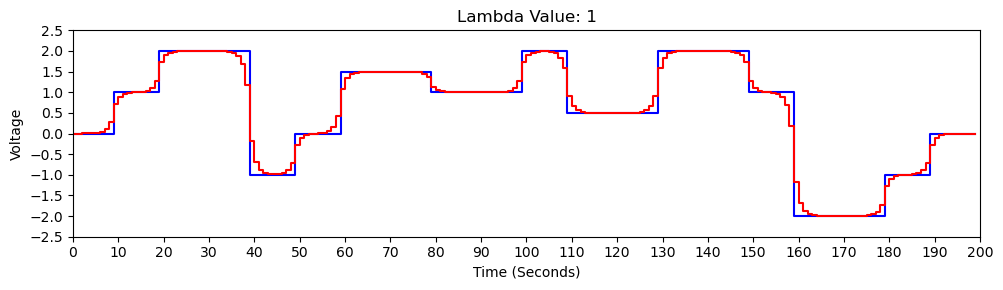

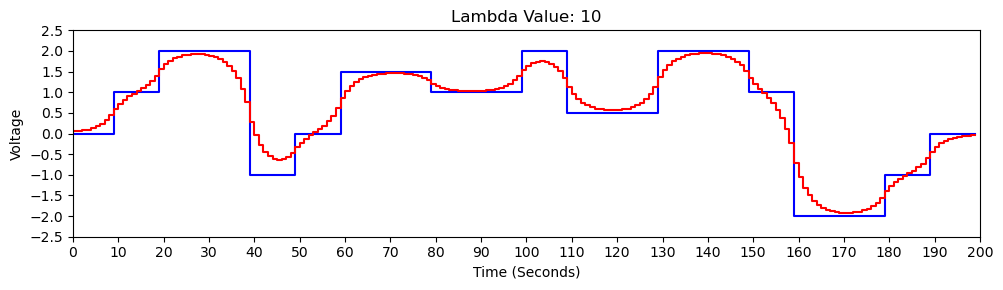

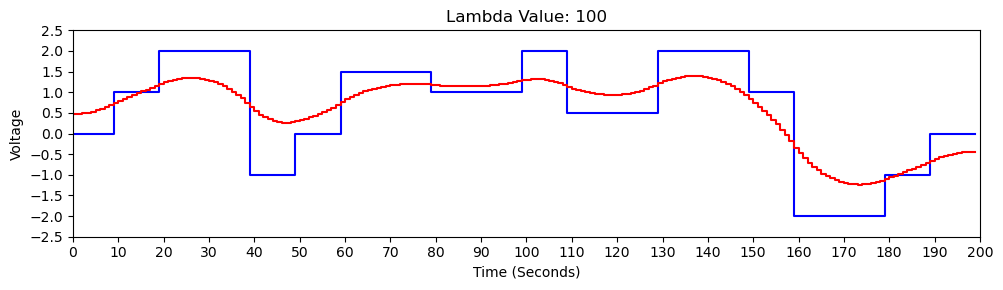

In [3]:
for lambda in [1 10 100]
    plotmodel(lambda)
    show()
end

## Question 2

### Part A

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 39.427944, 3, 0.000220, 0.000000, 0, 0.000000, 0.000000
3, 1.880662, 3, 0.000257, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.8806616352e+00
HiGHS run time      :          0.00


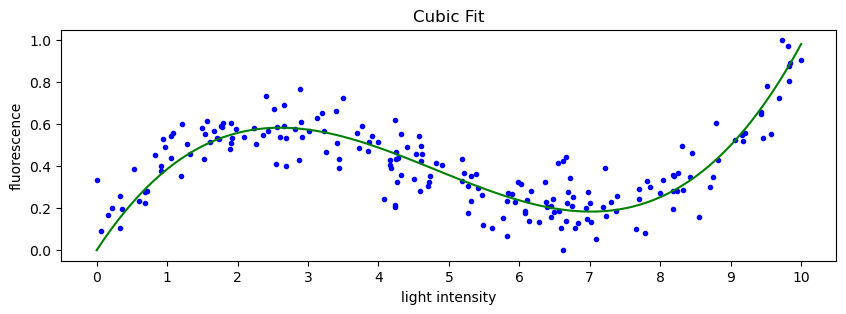

In [4]:
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

# plot the points
plotpoints()

# plot a dummy function(not the solution of course - that is for you to figure out)
xvals = 0:0.1:10

model = Model(HiGHS.Optimizer)
@variable(model, a[1:3])

# Min Least Squares
@objective(model, Min, sum( ((a[1]*x[i]^3 + a[2]*x[i]^2 + a[3]*x[i]) - y[i])^2 for i in 1:length(x)) )
optimize!(model)

avals = value.(a)
xvals = 0:0.1:10
yvals = avals[1]*xvals.^3 + avals[2]*xvals.^2 + avals[3]*xvals
plot(xvals, yvals, "g-")
show()
title("Cubic Fit");

### Part B

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 39.427944, 3, 0.001219, 0.000000, 0, 0.000000, 0.000000
211, 2.058417, 3, 0.006320, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 211
Objective value     :  2.0584151094e+00
HiGHS run time      :          0.01


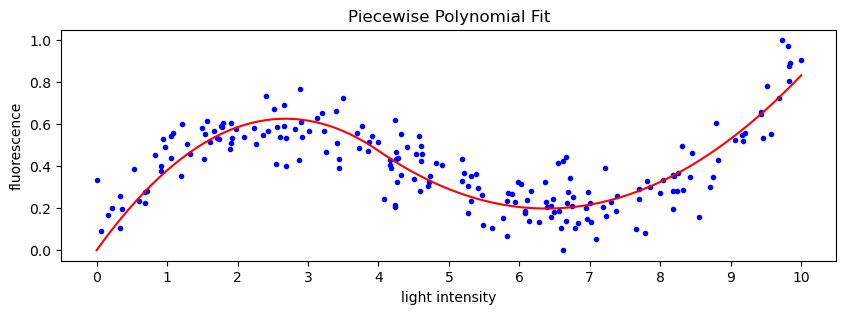

In [5]:
# plot the points
x = A[:,1]
y = A[:,2]
plotpoints()

model = Model(HiGHS.Optimizer)
@variable(model, p[1:3])
@variable(model, q[1:3])
@variable(model, y_pred[1:length(x)])

# Constraining with the piecewise equation
for i in 1:length(x)
    if 0 <= x[i] < 4
        @constraint(model, y_pred[i] == p[1]*x[i]^2 + p[2]*x[i] + p[3])
    elseif 4 <= x[i] < 10
        @constraint(model, y_pred[i] == q[1]*x[i]^2 + q[2]*x[i] + q[3])
    end
end
@constraint(model, p[3] == 0) # When x = 0, y_pred must be 0
@constraint(model, p[1]*(4^2) + p[2]*4 + p[3] == q[1]*(4^2) + q[2]*4 + q[3]) # Same value at x = 4
@constraint(model, 2*p[1]*4 + p[2] == 2*q[1]*4 + q[2]) # Same slope at x = 4

# Min Least Squares
@objective(model, Min, sum( (y_pred[i] - y[i])^2 for i in 1:length(x) ) )
optimize!(model)

xvals = 0:0.1:10
pvals = value.(p)
qvals = value.(q)
yvals = zeros(length(xvals)) 
for i in 1:length(xvals)
    if 0 <= xvals[i] < 4
        yvals[i] = pvals[1]*xvals[i]^2 + pvals[2]*xvals[i] + pvals[3]
    elseif 4 <= xvals[i] <= 10
        yvals[i] = qvals[1]*xvals[i]^2 + qvals[2]*xvals[i] + qvals[3]
    end
end

plot(xvals, yvals, "r-")
show()
title("Piecewise Polynomial Fit");

## Question 3

### Part A

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1428
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      482
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

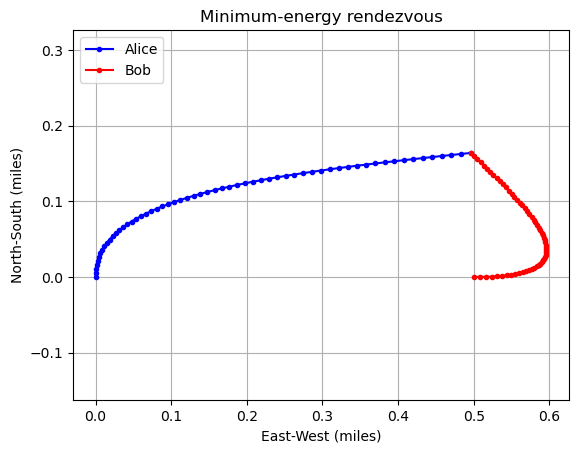

In [9]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.
using JuMP, Ipopt
using PyPlot

t = 1:60

model = Model(Ipopt.Optimizer)
# First entry is the time
# Second entry is the x and y coordinate
@variable(model, alice_x[1:2, 1:length(t)])
@variable(model, alice_v[1:2, 1:length(t)])
@variable(model, alice_u[1:2, 1:length(t)])

@variable(model, bob_x[1:2, 1:length(t)])
@variable(model, bob_v[1:2, 1:length(t)])
@variable(model, bob_u[1:2, 1:length(t)])

# Setting the initial conditions described
@constraint(model, alice_x[:, 1] .== [0; 0])
@constraint(model, alice_v[:, 1] .== [0; 20]) # Note miles per hour to miles per second conversion
@constraint(model, bob_x[:, 1] .== [0.5; 0])
@constraint(model, bob_v[:, 1] .== [30; 0]) # Note miles per hour to miles per second conversion

for t_t in 1:(length(t)-1)
    @constraint(model, alice_x[:, t_t + 1] .== alice_x[:, t_t] + (1/3600)*alice_v[:, t_t])
    @constraint(model, alice_v[:, t_t + 1] .== alice_v[:, t_t] + alice_u[:, t_t])
    
    @constraint(model, bob_x[:, t_t + 1] .== bob_x[:, t_t] + (1/3600)*bob_v[:, t_t])
    @constraint(model, bob_v[:, t_t + 1] .== bob_v[:, t_t] + bob_u[:, t_t])
end

# Make the end locations the same
@constraint(model, alice_x[:, 60] .== bob_x[:, 60])

@objective(model, Min, sum(alice_u.^2) + sum(bob_u.^2))

optimize!(model)
println("\nObjective Value: ", objective_value(model))

#ax=[0.0:.01:0.4 0.0:.005:0.2]; ax=ax';
#bx=[0.5:-.01:0.4 0.0:.02:0.2]; bx=bx';

ax = value.(alice_x)
bx = value.(bob_x)

println("\nFinal Meeting Location: ", ax[:, 60])

println("\nAlice's Thurst Sequence: ", value.(alice_u))
println("\nBob's Thurst Sequence: ", value.(bob_u))


plot(ax[1,:], ax[2,:],"b.-", label = "Alice")
plot(bx[1,:], bx[2,:],"r.-", label = "Bob")
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

### Part B

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:     1432
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      486
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 3.00e+01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

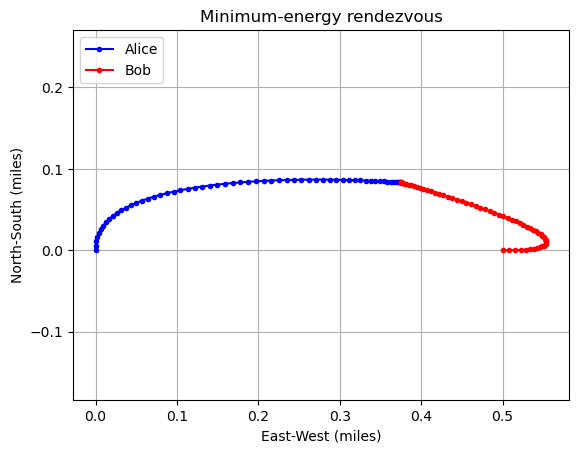

In [11]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.
using JuMP, Ipopt
using PyPlot

t = 1:60

model = Model(Ipopt.Optimizer)
# First entry is the time
# Second entry is the x and y coordinate
@variable(model, alice_x[1:2, 1:length(t)])
@variable(model, alice_v[1:2, 1:length(t)])
@variable(model, alice_u[1:2, 1:length(t)])

@variable(model, bob_x[1:2, 1:length(t)])
@variable(model, bob_v[1:2, 1:length(t)])
@variable(model, bob_u[1:2, 1:length(t)])

# Setting the initial conditions described
@constraint(model, alice_x[:, 1] .== [0; 0])
@constraint(model, alice_v[:, 1] .== [0; 20])
@constraint(model, bob_x[:, 1] .== [0.5; 0])
@constraint(model, bob_v[:, 1] .== [30; 0])

for t_t in 1:(length(t)-1)
    @constraint(model, alice_x[:, t_t + 1] .== alice_x[:, t_t] + (1/3600)*alice_v[:, t_t])
    @constraint(model, alice_v[:, t_t + 1] .== alice_v[:, t_t] + alice_u[:, t_t])
    
    @constraint(model, bob_x[:, t_t + 1] .== bob_x[:, t_t] + (1/3600)*bob_v[:, t_t])
    @constraint(model, bob_v[:, t_t + 1] .== bob_v[:, t_t] + bob_u[:, t_t])
end

# Make the end locations the same
@constraint(model, alice_x[:, 60] .== bob_x[:, 60])
# Make the end velocities zero
@constraint(model, alice_v[:, 60] .== [0; 0])
@constraint(model, bob_v[:, 60] .== [0; 0])

@objective(model, Min, sum(alice_u.^2) + sum(bob_u.^2))

optimize!(model)
println("\nObjective Value: ", objective_value(model))

#ax=[0.0:.01:0.4 0.0:.005:0.2]; ax=ax';
#bx=[0.5:-.01:0.4 0.0:.02:0.2]; bx=bx';

ax = value.(alice_x)
bx = value.(bob_x)

println("\nFinal Meeting Location: ", ax[:, 60])

println("\nAlice's Thurst Sequence: ", value.(alice_u))
println("\nBob's Thurst Sequence: ", value.(bob_u))

plot(ax[1,:], ax[2,:],"b.-", label = "Alice")
plot(bx[1,:], bx[2,:],"r.-", label = "Bob")
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

The optimal meeting locations change after constraining the final velocities to be 0

Without the constraints is: [0.4958333333333333, 0.1638888888888889]

With the constraints is: [0.375, 0.08333333333333334]